In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os

In [134]:
pride_palette_balanced = [
    "#3C38A0",  # deep indigo
#    "#7152B8",  # royal purple (new)
    "#1B7A6E",  # lighter teal
    "#3A2C20",  # cool dark brown
    "#C26824",  # bright burnt orange
    "#7A014A",  # wine magenta
]

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=pride_palette_balanced)


plt.rcParams["font.family"] = "Times New Roman"     # Normal text
plt.rcParams["mathtext.fontset"] = "custom"        # Custom math font
plt.rcParams["mathtext.rm"] = "Times New Roman"    # Roman font for math
plt.rcParams["mathtext.it"] = "Times New Roman:italic"
plt.rcParams["mathtext.bf"] = "Times New Roman:bold"
plt.rcParams["font.size"] = 14

In [103]:
def read_spe(date, infile):

    os.chdir(date) 
    
    hist_cts = []
    
    with open(infile) as f:
        for lineno, line in enumerate(f):
            if  12 <= lineno < 2060:
                hist_cts.append(float(line.strip()))
    hist_cts = np.array(hist_cts)
    
    os.chdir('..')

    return hist_cts 

def rebin(x, hist, factor):#### counts = hist
    new_x = x[::factor]
    new_hist = hist.reshape(-1, factor).sum(axis=1)
    return new_x, new_hist

def remove_zeros(x, hist):
    mask = np.where(hist>=0)
    hist = hist[mask]
    x = x[mask]
    return x, hist
    

def run_time_cal(bin_cal, time_cal):
    # --- USER INPUT -------------------------------------------------------------
    # Replace these with your actual calibration data
    
    num_bins = 2048   # total number of bins in your histogram
    # ---------------------------------------------------------------------------
    
    # --- FIT LINEAR RELATION ----------------------------------------------------
    # Fit t = a * bin + b
    coeffs = np.polyfit(bin_cal, time_cal, 1)
    a, b = coeffs
    print(f"Linear calibration fit: time = {a:.6e} * bin + {b:.6e}")
    
    # --- GENERATE TIMESTAMPS ----------------------------------------------------
    bins = np.arange(num_bins)
    timestamps = a * bins + b
    
    # --- CHECK TOTAL RANGE ------------------------------------------------------
    print(f"Time range: {timestamps[0]:.3f} to {timestamps[-1]:.3f} (units same as input)")
    

    return timestamps

In [104]:
def make_template_ideal(height, betamu, t0, twidth, nbins):
    c = 299792458/1e9

    width = 0.40
    length = 0.55

    N = 1000000

    x1 = np.random.uniform(-width/2 , width/2, N)
    y1 = np.random.uniform(0 , length, N)

    x2 = np.random.uniform(-width/2 , width/2, N)
    y2 = np.random.uniform(0 , length, N)

    L = np.sqrt((x1-y1)**2 + (x2-y2)**2 + height**2)

    vmu = c*betamu
    
    t = L/vmu + t0

    cos = height/L

    hist_ct, bin_edges = np.histogram(t, bins=nbins, weights=cos**2)

    return hist_ct/np.sum(hist_ct) , bin_edges

In [178]:
def trav_length(height, nbins):

    width = .40
    length = .55

    N = 1000000

    x1 = np.random.uniform(-width/2 , width/2, N)
    y1 = np.random.uniform(0 , length, N)

    x2 = np.random.uniform(-width/2 , width/2, N)
    y2 = np.random.uniform(0 , length, N)

    L = np.sqrt((x1-y1)**2 + (x2-y2)**2 + height**2)

    cos = height/L

    hist_ct, bin_edges = np.histogram(L, bins=nbins, weights=cos**2)

    avg = np.average(L, weights=cos**2)

    return hist_ct/np.sum(hist_ct) , bin_edges, avg

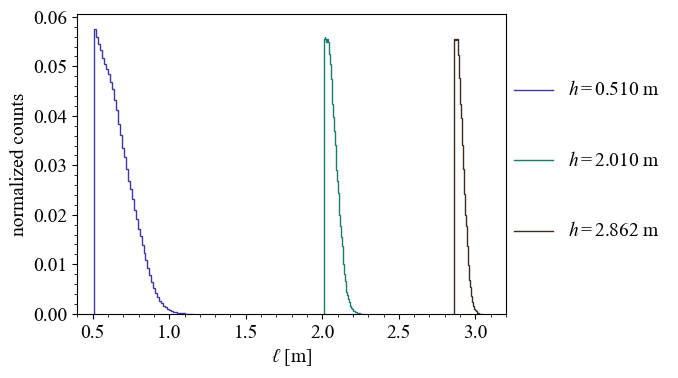

In [216]:
plt.figure(figsize=(7, 4))
bins = 50

nh, be, avg = trav_length( .510, bins)
plt.stairs(nh, be, label = '\n'+r'$h=0.510$ m'+'\n')
#plt.axvline(avg, 0,1, color = 'C0', )

#nh, be = make_template_ideal( 0.748, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.013, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.250, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.505, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be, avg = trav_length( 2.010, bins)
plt.stairs(nh,be, label = '\n'+r'$h=2.010$ m'+'\n')
#plt.axvline(avg, 0,1, color = 'C1')

#nh, be = make_template_ideal( 2.320, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 2.550, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be, avg = trav_length( 2.862, bins)
plt.stairs(nh,be, label = '\n'+r'$h=2.862$ m'+'\n')
#plt.axvline(avg, 0,1, color = 'C2')

plt.xlabel(r'$\ell$ [m]')
plt.ylabel(r'normalized counts')
plt.xlim(0.4, 3.2)
#plt.ylim(0, .032)
plt.legend(frameon = False, loc = (1,0.15))
plt.minorticks_on()
plt.tight_layout()
plt.savefig('travel_length_nomean.pdf')

In [ ]:
plt.figure(figsize=(7, 4))
bins = 50

nh, be, avg = trav_length( .510, bins)
plt.stairs(nh, be)
plt.axvline(avg, 0,1, color = 'C0', label = '\n'+r'$h=0.510$ m'+'\n'+r'$\mu(\ell) = $'+f'{avg:.3f} m'+'\n')

#nh, be = make_template_ideal( 0.748, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.013, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.250, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.505, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be, avg = trav_length( 2.010, bins)
plt.stairs(nh,be)
plt.axvline(avg, 0,1, color = 'C1', label = '\n'+r'$h=2.010$ m'+'\n'+r'$\mu(\ell) = $' + f'{avg:.3f} m'+'\n')

#nh, be = make_template_ideal( 2.320, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 2.550, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be, avg = trav_length( 2.862, bins)
plt.stairs(nh,be)
plt.axvline(avg, 0,1, color = 'C2', label = '\n'+r'$h=2.862$ m'+'\n'+r'$\mu(\ell)=$' +f'{avg:.3f} m'+'\n')

plt.xlabel(r'$\ell$ [m]')
plt.ylabel(r'normalized counts')
plt.xlim(0.4, 3.2)
#plt.ylim(0, .032)
plt.legend(frameon = False, loc = (1,0))
plt.minorticks_on()
plt.tight_layout()
plt.savefig('travel_length.pdf')

In [130]:
def make_template_real(height, betamu, t0, twidth, nbins):
    c = 299792458/1e9

    width = 0.40
    length = 0.55

    N = 1000000

    x1 = np.random.uniform(-width/2 , width/2, N)
    y1 = np.random.uniform(0 , length, N)

    x2 = np.random.uniform(-width/2 , width/2, N)
    y2 = np.random.uniform(0 , length, N)

    L = np.sqrt((x1-y1)**2 + (x2-y2)**2 + height**2)

    vmu = c*betamu
    
    t = L/vmu + t0 + np.random.normal(loc = 0, scale = twidth, size = N)

    cos = height/L

    hist_ct, bin_edges = np.histogram(t, bins=nbins, weights=cos**2)

    return hist_ct/np.sum(hist_ct) , bin_edges

In [106]:
bin_cal = np.array([328, 720, 1114, 1508, 1902])      # known bin indices
time_cal = np.array([10, 20, 30, 40, 50])   # corresponding times (e.g. ns)
time_0929 = run_time_cal(bin_cal, time_cal)

bin_cal = np.array([347, 741, 1137, 1532, 1928])      # known bin indices
time_cal = np.array([10, 20, 30, 40, 50])   # corresponding times (e.g. ns)   
time_1006 = run_time_cal(bin_cal, time_cal)

bin_cal = np.array([336, 729, 1125, 1520, 1915])      # known bin indices
time_cal = np.array([10, 20, 30, 40, 50])   # corresponding times (e.g. ns)
time_1008 = run_time_cal(bin_cal, time_cal)

Linear calibration fit: time = 2.540648e-02 * bin + 1.687021e+00
Time range: 1.687 to 53.694 (units same as input)
Linear calibration fit: time = 2.529722e-02 * bin + 1.237055e+00
Time range: 1.237 to 53.020 (units same as input)
Linear calibration fit: time = 2.532284e-02 * bin + 1.511810e+00
Time range: 1.512 to 53.348 (units same as input)


In [107]:
hist = read_spe('2025-10-01', '1001-speed-10ft-51.0.Spe')
time0510, hist0510 = remove_zeros(*rebin(time_0929, hist, 16))
N0510 = np.sum(hist0510[1:])
normed0510 = hist0510[1:] /N0510

hist = read_spe('2025-10-06', '1006-speed-10ft-74.8.Spe')
time0748, hist0748 = remove_zeros(*rebin(time_1006, hist, 16))
N0748 = np.sum(hist0748[1:])
normed0748 = hist0748[1:] / N0748

hist = read_spe('2025-10-01', '1001-speed-10ft-101.3.Spe')
time1013, hist1013 = remove_zeros(*rebin(time_0929, hist, 16))
N1013 = np.sum(hist1013[1:])
normed1013 = hist1013[1:] / N1013

hist = read_spe('2025-10-08', '1008-speed-10ft-125.0.Spe')
time1250, hist1250 = remove_zeros(*rebin(time_1008, hist, 16))
N1250 = np.sum(hist1250[1:])
normed1250 = hist1250[1:] / N1250

hist = read_spe('2025-10-06', '1006-speed-10ft-150.5.Spe')
time1505, hist1505 = remove_zeros(*rebin(time_1006, hist, 16))
N1505 = np.sum(hist1505[1:])
normed1505 = hist1505[1:] / N1505

hist = read_spe('2025-10-08', '1008-speed-10ft-201.0.Spe')
time2010, hist2010 = remove_zeros(*rebin(time_1008, hist, 16))
N2010 = np.sum(hist2010[1:])
normed2010 = hist2010[1:] / N2010

hist = read_spe('2025-10-07', '1007-speed-10ft-230.2.Spe')
time2302, hist2302 = remove_zeros(*rebin(time_1006, hist, 16))
N2302 = np.sum(hist2302[1:])
normed2302 = hist2302[1:] / N2302

hist = read_spe('2025-10-08', '1008-speed-10ft-255.0.Spe')
time2550, hist2550 = remove_zeros(*rebin(time_1008, hist, 16))
N2550 = np.sum(hist2550[1:])
normed2550 = hist2550[1:] / N2550

hist = read_spe('2025-10-01', '1001-speed-10ft-286.2.Spe')
time2862, hist2862 = remove_zeros(*rebin(time_0929, hist, 16))
N2862 = np.sum(hist2862[1:])
normed2862 = hist2862[1:] / N2862

In [108]:
heights = np.array([.510, .748, 1.013, 1.250, 1.505,  2.010, 2.302, 2.550, 2.862])
sigma1 = np.array([3.12601793, 3.40718541, 3.66614705, 4.02818338, 3.95241162, 4.06361301, 4.06448354, 4.10070355, 4.23085751])
sigma2 = np.array([5.23909243, 5.50090594, 5.75932699, 5.65587234, 5.97943425, 5.99030794, 6.06227083, 6.01217893, 5.68898524])

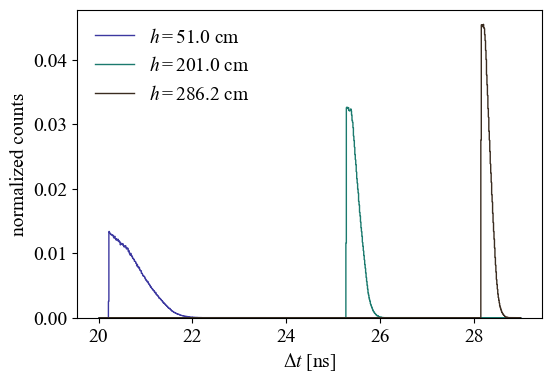

In [141]:
plt.figure(figsize=(6, 4))
bins = np.linspace(20,29,900)

nh, be = make_template_ideal( 0.510, 0.99, 18.5, 0.001, bins)
plt.stairs(nh,be, label = r'$h=51.0$ cm')

#nh, be = make_template_ideal( 0.748, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.013, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.250, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 1.505, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be = make_template_ideal( 2.010, 0.99, 18.5, 0.001, bins)
plt.stairs(nh,be, label = r'$h=201.0$ cm')

#nh, be = make_template_ideal( 2.320, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

#nh, be = make_template_ideal( 2.550, 0.99, 18.5, 0.001, bins)
#plt.stairs(nh,be)

nh, be = make_template_ideal( 2.862, 0.99, 18.5, 0.001, bins)
plt.stairs(nh,be, label = r'$h=286.2$ cm')

plt.xlabel(r'$\Delta t$ [ns]')
plt.ylabel(r'normalized counts')
plt.legend(frameon = False)
plt.savefig('time_sim.pdf')

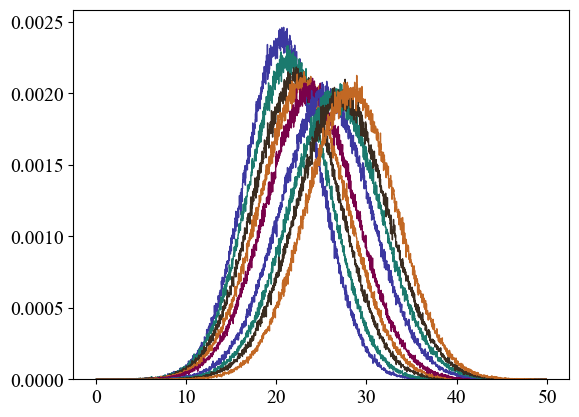

In [145]:
bins = np.linspace(0,50,2000)

nh, be = make_template_real( 0.510, 0.99, 18.5, 0.5*(sigma1[0]+sigma2[0]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 0.748, 0.99, 18.5, 0.5*(sigma1[1]+sigma2[1]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 1.013, 0.99, 18.5, 0.5*(sigma1[2]+sigma2[2]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 1.250, 0.99, 18.5, 0.5*(sigma1[3]+sigma2[3]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 1.505, 0.99, 18.5, 0.5*(sigma1[4]+sigma2[4]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 2.010, 0.99, 18.5, 0.5*(sigma1[5]+sigma2[5]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 2.320, 0.99, 18.5, 0.5*(sigma1[6]+sigma2[6]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 2.550, 0.99, 18.5, 0.5*(sigma1[7]+sigma2[7]), bins)
plt.stairs(nh,be)

nh, be = make_template_real( 2.862, 0.99, 18.5, 0.5*(sigma1[8]+sigma2[8]), bins)
plt.stairs(nh,be)

<ErrorbarContainer object of 3 artists>

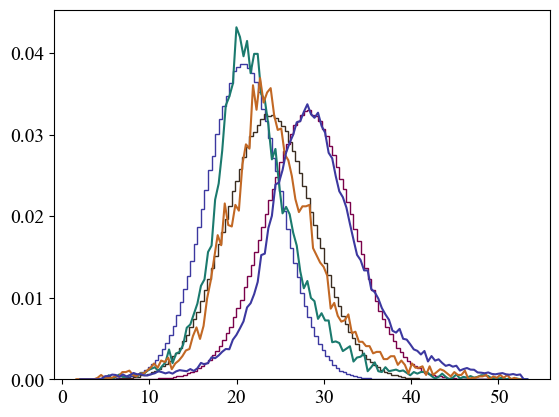

In [147]:

#plt.scatter(time0510[1:], normed0510[1:])
nh, be = make_template_real( 0.510, 0.99, 18.5, 0.5*(sigma1[0]+sigma2[0]), time0510[1:])
plt.stairs(nh,be)
plt.errorbar(time0510[1:], normed0510, yerr=0)

#plt.scatter(time1505[1:], normed1505[1:])
nh, be = make_template_real( 1.505, 0.99, 18.5, 0.5*(sigma1[4]+sigma2[4]), time1505[1:])
plt.stairs(nh,be)
plt.errorbar(time1505[1:], normed1505, yerr=0)

#plt.scatter(time2862[1:], normed2862[1:])
nh, be = make_template_real( 2.862, 0.99, 18.5, 0.5*(sigma1[8]+sigma2[8]), time2862[1:])
plt.stairs(nh,be)
plt.errorbar(time2862[1:], normed2862, yerr=0)

#plt.yscale()